### Histogram windowing in Jupyter

*Greg Kiar*, Mar 29th, 2016

The following describes how to use a class I created which enables the windowing of multiple similar histograms in a Jupyter notebook. This was developed for the usecase in which the data of interest is buried in a histogram dominated by noise, and helps you define bounds for areas of interest within your data.

The class expects two parameters, with and optional third:
- **``fname``**: File name to a dictionary containing your histogram and the densities over which it exists
- **``name``**: Dataset name to be put on the header of a plot
- **``color``** (optional): Enables colour plotting of the histograms

First, we must generate some data and compute our density values.

In [1]:
import numpy as np
from scipy.stats import gaussian_kde
import os

np.random.seed(123456789)

N = 5
data = {str(val): np.random.rand(500) for val in range(N)}

maxx = np.max([np.max(data[key]) for key in data])
minn = np.min([np.min(data[key]) for key in data])

xs = np.linspace(minn, maxx, 300)

pdfs = {key: gaussian_kde(data[key]).pdf(xs) for key in data}

Now let's save it in the proper format.

In [2]:
import pickle

outf = open('./myoutfile.pkl', 'wb')
pickle.dump({"pdfs":pdfs, "xs":xs}, outf)
outf.close()

Finally we can load it back in and plot + play with our histograms

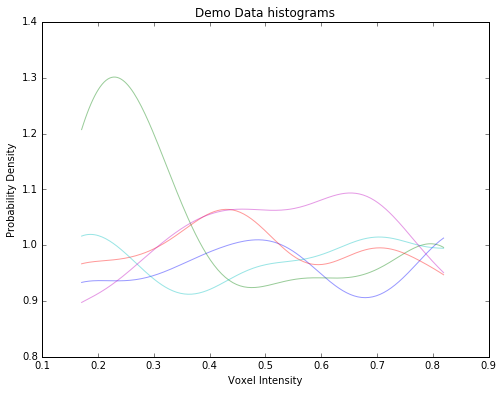

X-Min: 0.170628531185
X-Max: 0.822668158971


In [3]:
from histogram_window import histogram_windowing
%matplotlib inline

histogram_windowing('./myoutfile.pkl', 'Demo Data', color=True)